## Atividade prática: Árvores de Decisão

Aprendizado de Máquina (INF/UFRGS) 2021/2

Moniele Kunrath Santos

--------------------------------------------
\
Este Notebook apresenta a atividade prática do algoritmo de **Árvores de Decisão**, utilizando Sklearn.

-------------------------------------------------------------------



Objetivo da atividade:
- Treinar árvores de decisão para uma tarefa de classificação
- Observar o impacto de diferentes hiperparâmetros na árvore de decisão gerada relacionados a controle da complexidade da árvore eestratégias de poda
- Observar o impacto de diferentes amostras de dados na árvore de decisão gerada
- Interpretar as árvores de decisão obtidas

O dataset utilizado é o Pima Indians Diabetes (https://www.kaggle.com/uciml/pima-indians-diabetes-database) e foi obtido do repositório Kaggle. O objetivo da tarefa de classificação é prever se um paciente terá ou não diabetes de acordo com um conjunto de 8 atributos
fornecidos. O conjunto possui **768 instâncias** e a classe alvo está na coluna
**Outcome (1 = tem diabetes, 0 = não tem diabetes)**.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import random
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import display

### Carregando o dataset

In [ ]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = data.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y = data.iloc[:, -1]


### Utilizando Cross-Validation  Estratificado do Sklearn

A utilização desse método é para ter uma estimativa melhor do desempenho final dos modelos. O `StratifiedShuffleSplit` divide o dataset em n partes de teste e treino, mantendo as proporções das classes. Então faço uma média simples sobre todas essas execuções. Por padrão utilizei **n=10**.

In [ ]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=random.seed())

### Experimento A

Treine e teste árvores de decisão utilizando como critério de seleção de
atributos o Gain Ratio/Entropy (C4.5/J48) ou Índice Gini (CART) -
especifique no relatório sua escolha. 

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")

scores = cross_val_score(clf, X, y, cv=cv)

print("Accuracy:",scores.mean())

Accuracy: 0.688961038961039


In [ ]:
for train_index, test_index in cv.split(X,y):
  clf.fit(X.loc[train_index], y.loc[train_index])

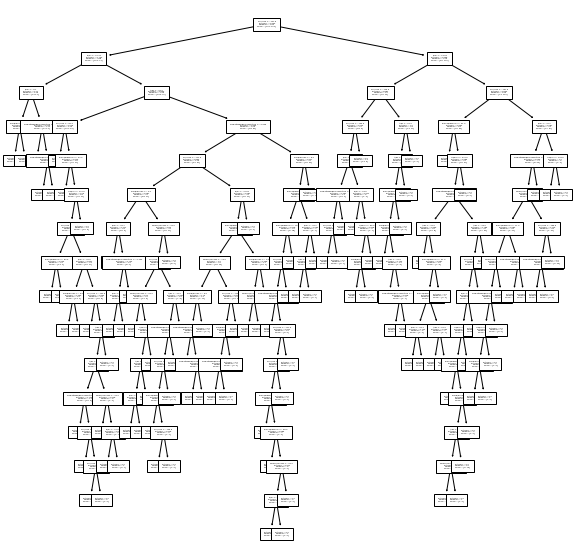

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=2,
                                    feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness",
                                    "Insulin","BMI","DiabetesPedigreeFunction","Age"])
plt.show()

In [ ]:

 
dot_data = export_graphviz(clf, filled=True, rounded=True,max_depth=3,out_file=None,
    feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age"], class_names=['0','1'])
graph = graph_from_dot_data(dot_data)
graph.write_png('/work/masters-degree-class-assignments/AM/decision-trees/ExperimentA-plot-tree.png')

True

![s](ExperimentA-plot-tree.png)

#### Qual o desempenho do modelo? Qual parece ser o atributo mais relevante para a classificação, de acordo com o modelo gerado?

Utilizando a configuração de critério de seleção entropia, max_deph=none (i.e. expande até todas as folhas serem puras ou até todas as folhas tiverem menos de 2 samples), min_samples_leaf=1, o modelo alcançou acurácia de **69%**. O atributo mais relevante e informativo para classificação é a **glicose**, pois aponta ser o atributo raiz da árvore plotada a cima com maior entropia.

In [ ]:
#testX = np.array(data.iloc[:, [1,7]]) pega as colunas 1 e 7
#testY = np.array(data.iloc[:, -1]) pega a ultima coluna

### Experimento B

Repita o treinamento do modelo utilizando o mesmo algoritmo do item
anterior (isto é, mesmo critério de seleção de atributos) e mesma
divisão de dados em treino e teste, mas agora variando os
hiperparâmetros relacionados à complexidade do modelo (como
profundidade máxima e/ou número de instâncias no nó folha). Informe
no relatório os valores testados para cada hiperparâmetro variado.
Demonstre e comente como a variação destes hiperparâmetros impacta
na acurácia e complexidade do modelo (uso o modelo obtido no item A
como “baseline”). Compare também as regras de classificação extraídas
a partir de ambos os modelos, comentando brevemente como estes
parâmetros parecem impactar no poder de generalização das regras
(isto é, se as regras de classificação extraídas parecem ser mais
“genéricas” ou “mais especializadas” para subconjunto de instâncias de
treinamento). Inclua no seu relatório exemplos de regras de
classificação obtidas a partir dos modelos gerados.

#### Alterando profundidade máxima da árvore

In [ ]:
# max_deph 1, 3, 7 and 10

for x in range(1, 31, 1):
    clf = DecisionTreeClassifier(random_state=31, criterion="entropy", max_depth=x)
    score = cross_val_score(clf, X, y, cv=cv)
    print("Accuracy of max_deph="+str(x)+" | "+str(score.mean()))

Accuracy of max_deph=1 | 0.718181818181818
Accuracy of max_deph=2 | 0.7383116883116883
Accuracy of max_deph=3 | 0.7311688311688311
Accuracy of max_deph=4 | 0.7181818181818183
Accuracy of max_deph=5 | 0.72987012987013
Accuracy of max_deph=6 | 0.72987012987013
Accuracy of max_deph=7 | 0.7006493506493506
Accuracy of max_deph=8 | 0.7181818181818183
Accuracy of max_deph=9 | 0.7266233766233766
Accuracy of max_deph=10 | 0.7253246753246753
Accuracy of max_deph=11 | 0.7084415584415585
Accuracy of max_deph=12 | 0.6863636363636363
Accuracy of max_deph=13 | 0.7045454545454545
Accuracy of max_deph=14 | 0.6863636363636364
Accuracy of max_deph=15 | 0.7077922077922079
Accuracy of max_deph=16 | 0.7045454545454546
Accuracy of max_deph=17 | 0.7123376623376623
Accuracy of max_deph=18 | 0.6948051948051948
Accuracy of max_deph=19 | 0.7071428571428572
Accuracy of max_deph=20 | 0.7129870129870131
Accuracy of max_deph=21 | 0.7214285714285714
Accuracy of max_deph=22 | 0.7097402597402597
Accuracy of max_deph=23 

Observa-se que quanto maior a profundidade da árvore, pior seu desempenho. O motivo desse comportamento está no fato de que provavelmente a árvore mais expressiva para esse problema é uma com altura entre 1 e 3. Quando passamos do limite necessário de generalização, aumentará a complexidade da árvore, provavelmente causando sobreajuste nos dados de treinamento e portanto errando as instâncias do dataset de teste.

#### Alterando número de instâncias nos nodos da folha

Nessa parte estarei testando diferentes configurações para o parâmetro `min_samples_leaf`que decide qual o mínimo de instâncias do dataset para a criação de uma nova folha. Então se, por exemplo, for definido um mínimo igual a 8, todas as folhas vão ter no mínimo 8 instâncias.

In [ ]:
# min_samples_leaf from 5 to 200

for x in range(5,201,5):
    
    clf = DecisionTreeClassifier(random_state=random.seed(), criterion="entropy", min_samples_leaf=x)
   
    score = cross_val_score(clf, X, y, cv=cv)
    print("Accuracy of min_samples_leaf="+str(x)+" | "+str(score.mean()))

Accuracy of min_samples_leaf=5 | 0.6948051948051949
Accuracy of min_samples_leaf=10 | 0.7668831168831168
Accuracy of min_samples_leaf=15 | 0.735064935064935
Accuracy of min_samples_leaf=20 | 0.7623376623376623
Accuracy of min_samples_leaf=25 | 0.7480519480519481
Accuracy of min_samples_leaf=30 | 0.7616883116883117
Accuracy of min_samples_leaf=35 | 0.7363636363636364
Accuracy of min_samples_leaf=40 | 0.7474025974025975
Accuracy of min_samples_leaf=45 | 0.7454545454545454
Accuracy of min_samples_leaf=50 | 0.7454545454545455
Accuracy of min_samples_leaf=55 | 0.7415584415584415
Accuracy of min_samples_leaf=60 | 0.7603896103896105
Accuracy of min_samples_leaf=65 | 0.7415584415584415
Accuracy of min_samples_leaf=70 | 0.7454545454545455
Accuracy of min_samples_leaf=75 | 0.7344155844155844
Accuracy of min_samples_leaf=80 | 0.7480519480519481
Accuracy of min_samples_leaf=85 | 0.7272727272727273
Accuracy of min_samples_leaf=90 | 0.7376623376623377
Accuracy of min_samples_leaf=95 | 0.740909090909

Podemos inferir que a partir dos resultados obtidos, o número mais adequado para ser mínimo de instâncias por folha para essa árvore é o 20. E ainda, quando aumentamos os valores mínimos, o desempenho do modelo tende a piorar. Uma das possíveis razões desse comportamento é que o modelo começa a ficar genérico demais (árvore com menor profundidade), portanto perde um pouco do desempenho ao classificar incorretamente novas instâncias. 

Na visualização das árvores abaixo, observa-se que o aumento do número mínimo de instâncias por folha, indica que a profundidade diminui, assim como sua complexidade. O mesmo acontece vice-versa, árvores com menos limitação de instâncias por folha tendem a possuir mais níveis.    

#### Representação visual de árvores com instâncias mínimas igual a 50

In [ ]:
clf = DecisionTreeClassifier(random_state=1, criterion="entropy", min_samples_leaf=50)
   
for train_index, test_index in cv.split(X,y):
  clf.fit(X.loc[train_index], y.loc[train_index])

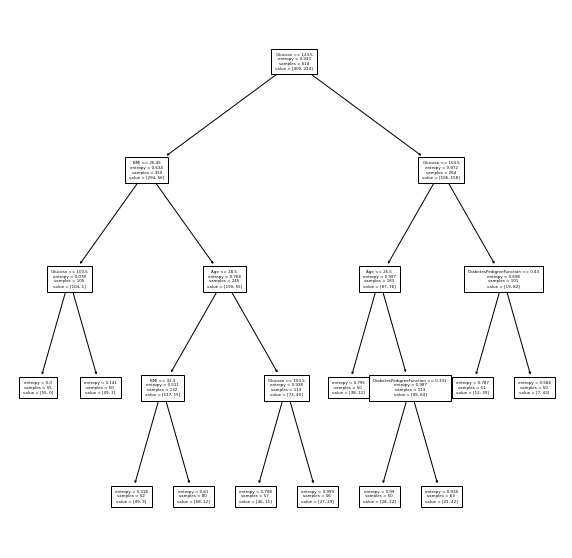

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=4,
                feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"])
                                    
plt.show()

#### Representação visual de árvores com instâncias mínimas igual a 5

In [ ]:
clf = DecisionTreeClassifier(random_state=1, criterion="entropy", min_samples_leaf=5)

for train_index, test_index in cv.split(X,y):
  clf.fit(X.loc[train_index], y.loc[train_index])

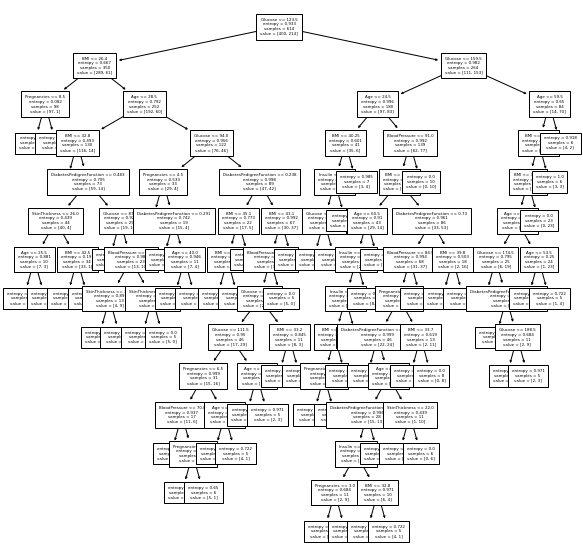

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=4,
                feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"])
                                    
plt.show()

Podemos concluir desse experimento que:
- aumentando a profundidade da árvore, tende a aumentar a complexidade do modelo e portanto diminuir a sua capacidade de generalizar adequadamente novas instâncias (sobreajuste). 

- aumentando o mínimo de instâncias por folha, o modelo tende a perder complexidade e portanto, não é expressivo o suficiente para capturar padrões nos dados (subajuste). 

Em suma, devemos ter cuidado na hora de escolher esses hiperparâmetros, pois percebe-se sempre existirá um *trade-off*. Desse modo, deve haver um equilíbrio na parametrização que nos permita criar um modelo com "bom ajuste" que consiga generalizar de forma correta nossos dados.

In [ ]:
# Desempenho com os hiperparâmetros min_samples_leaf + max_deph

clf = DecisionTreeClassifier(random_state=31, criterion="entropy", min_samples_leaf=20, max_depth=2)

score = cross_val_score(clf, X, y, cv=cv)

print("Accuracy of "+str(score.mean()))

Accuracy of 0.7337662337662337


### Experimento C

Utilize o mesmo algoritmo do "baseline" gerado no item A e agora
repita o processo de treinamento com e sem estratégia de poda. Caso
não seja possível optar por treinamento sem poda, varie o
hiperparâmetro associado ao controle da complexidade na etapa de
poda. Compare os modelos obtidos quanto à estrutura da árvore,
número de testes, atributos usados, etc., e seus respectivos
desempenhos. Informe no relatório os valores testados para cada
hiperparâmetro. 

Criando dataframes para manipular os dataset de treino.

In [ ]:
X_train = pd.DataFrame()
y_train = pd.DataFrame()
X_test = pd.DataFrame()
y_test = pd.DataFrame()


In [ ]:
for train_index, test_index in cv.split(X,y):
  X_train = (X.loc[train_index]).copy()
  y_train = (y.loc[train_index]).copy()
  X_test = (X.loc[test_index]).copy()
  y_test = (y.loc[test_index]).copy()

Baseline do experimento A:

In [ ]:
clf = DecisionTreeClassifier(random_state=31, criterion="entropy")

score = cross_val_score(clf, X, y, cv=cv)
print("Accuracy of "+str(score.mean()))

Accuracy of 0.6922077922077922


In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00325733, 0.00395338, 0.00438104, 0.00448679,
        0.00448679, 0.00448679, 0.00448679, 0.00488599, 0.00509611,
        0.0052852 , 0.0052852 , 0.0052852 , 0.0055536 , 0.00587889,
        0.00587889, 0.00590529, 0.00594704, 0.00594871, 0.00600275,
        0.00635201, 0.00641117, 0.00666514, 0.00668496, 0.00671491,
        0.00687187, 0.00691621, 0.00697592, 0.00708227, 0.00708227,
        0.00734729, 0.00763049, 0.00763836, 0.00779288, 0.00828242,
        0.00828366, 0.00852316, 0.00897357, 0.00897403, 0.00907319,
        0.00964245, 0.01000937, 0.0105704 , 0.01151796, 0.01165152,
        0.01283071, 0.01619311, 0.01644123, 0.01726385, 0.03256085,
        0.04499544, 0.04905321, 0.14299423]),
 'impurities': array([0.        , 0.00325733, 0.01116409, 0.01554513, 0.0245187 ,
        0.03349228, 0.04246585, 0.04695264, 0.05672463, 0.07710908,
        0.08239428, 0.08767948, 0.09296468, 0.09851828, 0.10439718,
        0.11027607, 0.13389724, 0.13984428

Text(0, 0.5, 'total impurity of leaves')

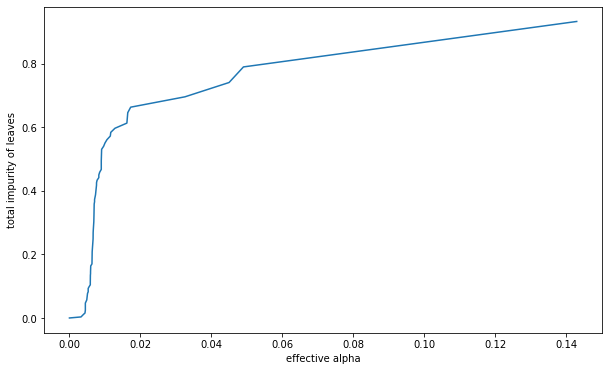

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=31, criterion="entropy", ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

O `DecisionTreeClassifier` fornece parâmetros como `min_samples_leaf` e `max_depth` para evitar que uma árvore seja sobreajustada. A poda de complexidade de custo oferece outra opção para controlar o tamanho de uma árvore. No `DecisionTreeClassifier`, essa técnica de poda é parametrizada pelo parâmetro de complexidade de custo, `ccp_alpha`. Valores maiores de `ccp_alpha` aumentam o número de nós removidos. Abaixo mostrarei o efeito do `ccp_alpha` na regularização das árvores e como escolher um `ccp_alpha` com base nas acurárias de teste.

Text(0, 0.5, 'total depth')

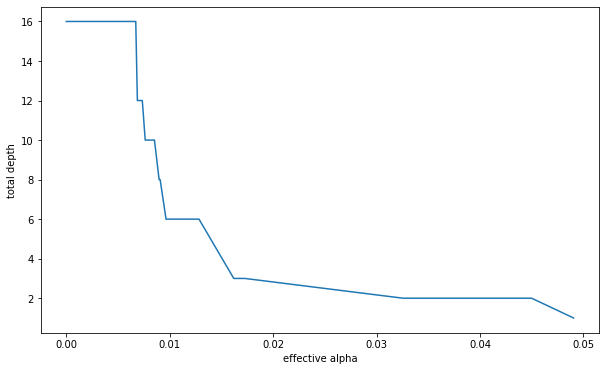

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Test Accuracy scores')

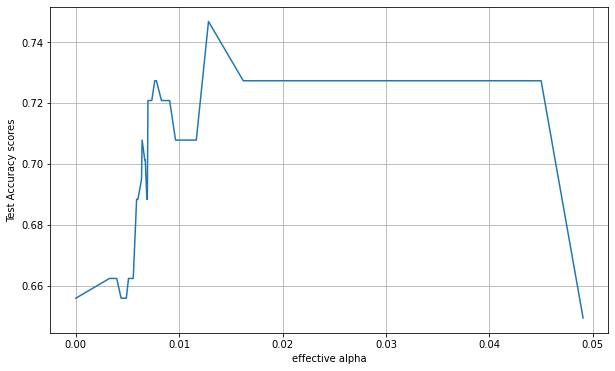

In [ ]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Test Accuracy scores")

Podemos notar a partir do gráfico que um valor de alpha aproximado a 0.012 oferece um modelo com melhor performance. A acurácia no dataset de teste chega a 0.72 e depois desse ponto o desempenho do modelo cai ao realizar a próxima poda.

#### Intuitivamente, qual modelo você imagina ser melhor para classificar novas instâncias: o que utiliza ou não utiliza estratégia de poda (ou, de forma alternativa, aquele com uma poda mais ou menos drástica)?

Utilizando alpha na baseline feita no experimento A.

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.012)

score = cross_val_score(clf, X, y, cv=cv)

print("Accuracy:",score.mean())

Accuracy: 0.7402597402597403


Claramente vemos que em comparação com a baseline (acurácia igual a 0,68~0,69), o modelo com poda teve um desempenho melhor. Entretanto esse valor deve ser exato (ou bem aproximado), pois qualquer aleatoriedade nesse coeficiente há grandes chances de quedas no desempenho da árvore.

### Experimento D

De acordo com as suas observações para os itens A, B e C, escolha
uma configuração para treinamento de árvores de decisão (critério de
seleção de nós, controle de complexidade, estratégia de poda). Repita
o processo de treino e teste com 10 partições aleatórias distintas dos
dados (isto é, repita o processo de holdout 10 vezes usando seeds
aleatórias diferentes). Compare os desempenhos obtidos e as
estruturas das 10 árvores de decisão geradas. Descreva de forma
objetiva se observou variações no desempenho e na estrutura das
árvores geradas.

In [ ]:
# árvore com hiperparâmetros escolhidos

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=20)

score = cross_val_score(clf, X, y, cv=cv)

print("Accuracy:",score.mean())

Accuracy: 0.7532467532467533


#### Visualização da árvore

In [ ]:
for train_index, test_index in cv.split(X,y):
  clf.fit(X.loc[train_index], y.loc[train_index])

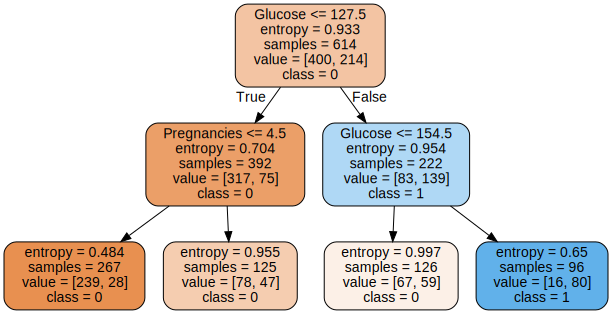

In [ ]:
dot_data = export_graphviz(clf, filled=True, rounded=True,max_depth=3,out_file=None,
    feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age"], class_names=['0','1'])
graph = graphviz.Source(dot_data)
graph

### Criando 10 árvores aleatórias com o método holdout 

Tree Number 1
Accuracy: 0.7662337662337663
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


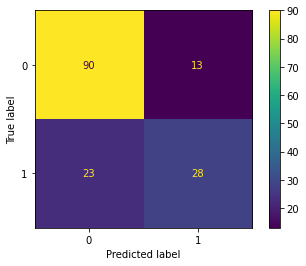

-------------------------
Tree Number 2
Accuracy: 0.7597402597402597
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


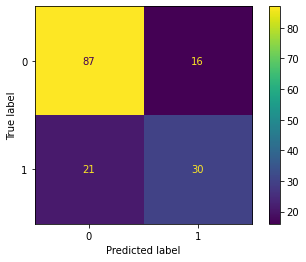

-------------------------
Tree Number 3
Accuracy: 0.6493506493506493
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


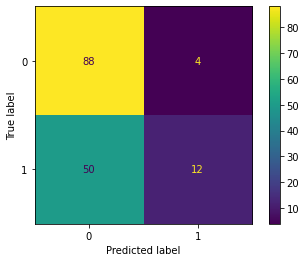

-------------------------
Tree Number 4
Accuracy: 0.7532467532467533
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


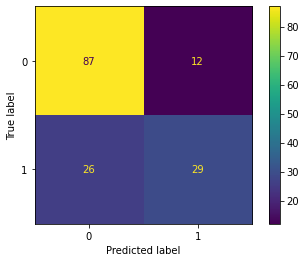

-------------------------
Tree Number 5
Accuracy: 0.7467532467532467
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


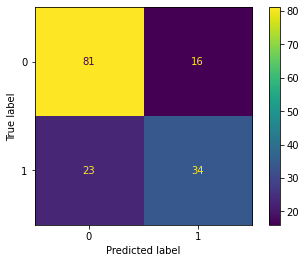

-------------------------
Tree Number 6
Accuracy: 0.7597402597402597
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


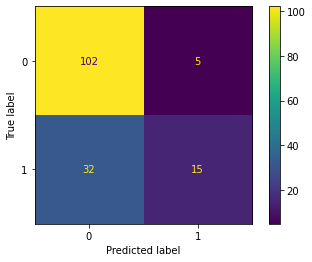

-------------------------
Tree Number 7
Accuracy: 0.7077922077922078
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


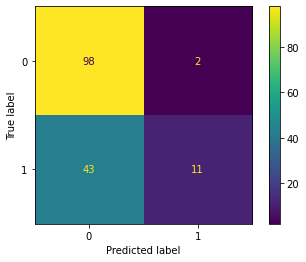

-------------------------
Tree Number 8
Accuracy: 0.6948051948051948
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


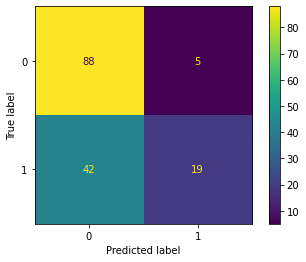

-------------------------
Tree Number 9
Accuracy: 0.7532467532467533
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


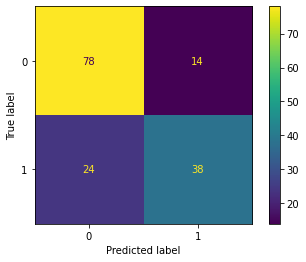

-------------------------
Tree Number 10
Accuracy: 0.7402597402597403
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


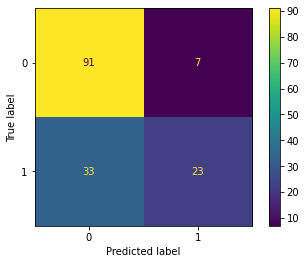

-------------------------


In [ ]:

for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random.seed())

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=20)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Tree Number", i+1)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()

    print("-------------------------")

Observa-se que utilizando o método holdout sem a estratificação no dados, gera árvores com desempenhos variando acurácias de 0,64 a 0,75. O que é coerente, visto exitem proporções diferentes das instâncias de cada classe no dataset. Portanto agora demonstro o comportamento das árvores ao estratificar o dados de treino e teste.

### Criando 10 árvores aleatórias com o método holdout estratificado

Tree Number 1
Accuracy: 0.7272727272727273
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


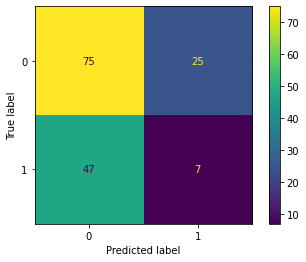

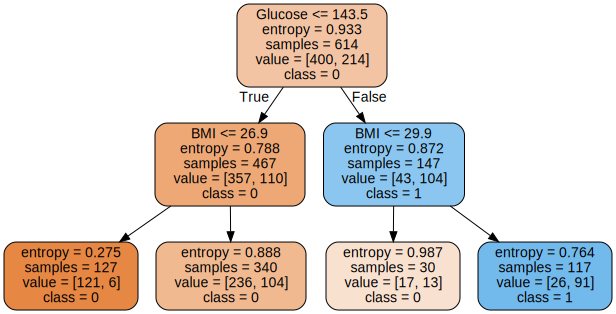

Tree Number 2
Accuracy: 0.7597402597402597
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


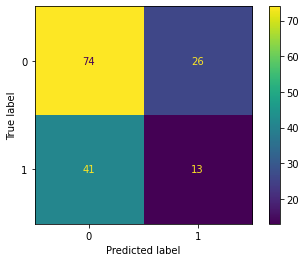

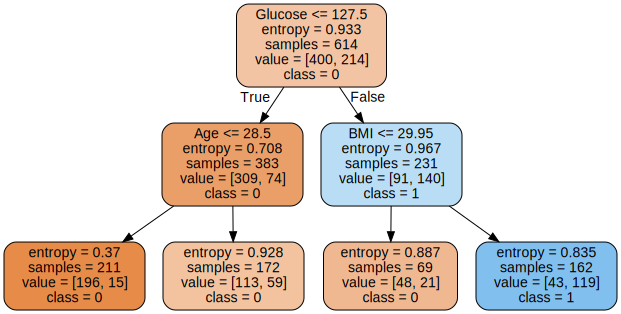

Tree Number 3
Accuracy: 0.7597402597402597
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


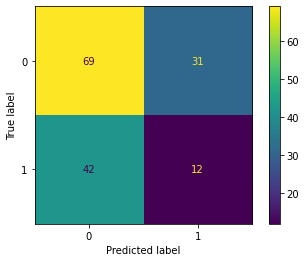

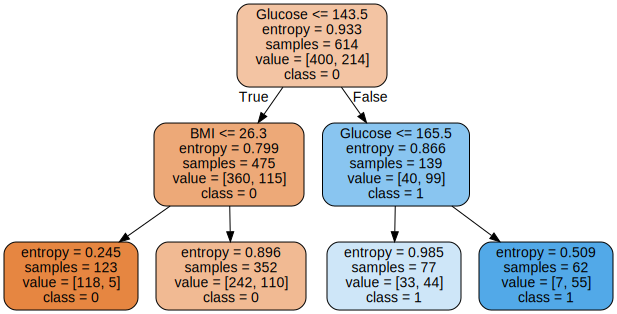

Tree Number 4
Accuracy: 0.7532467532467533
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


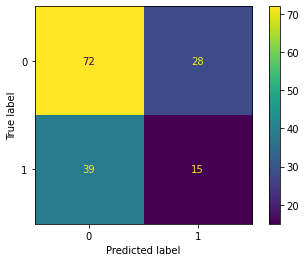

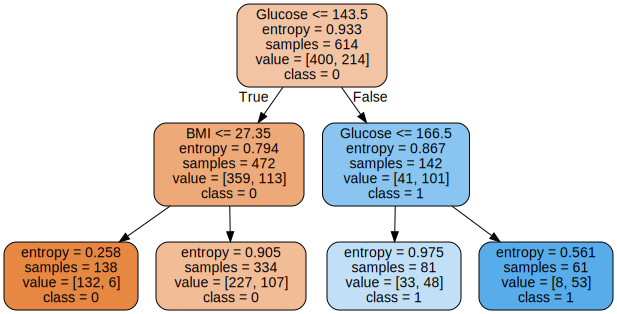

Tree Number 5
Accuracy: 0.7402597402597403
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


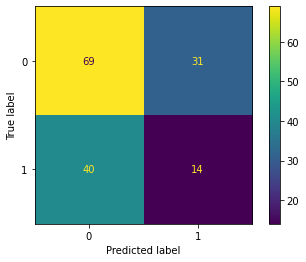

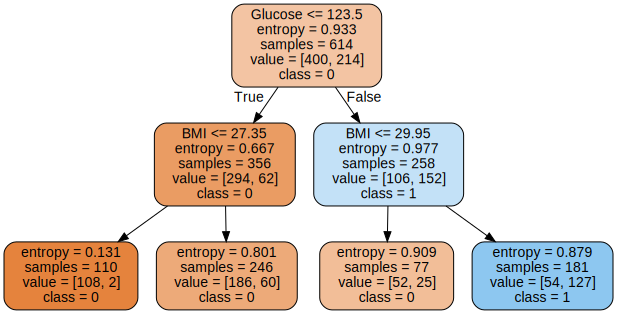

Tree Number 6
Accuracy: 0.7142857142857143
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


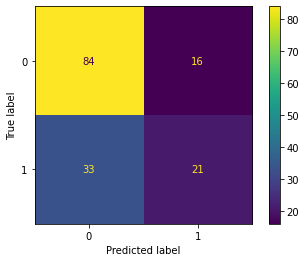

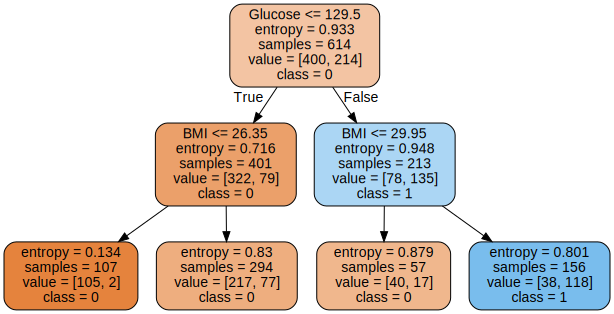

Tree Number 7
Accuracy: 0.7597402597402597
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


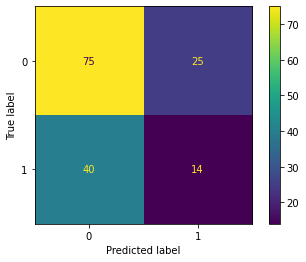

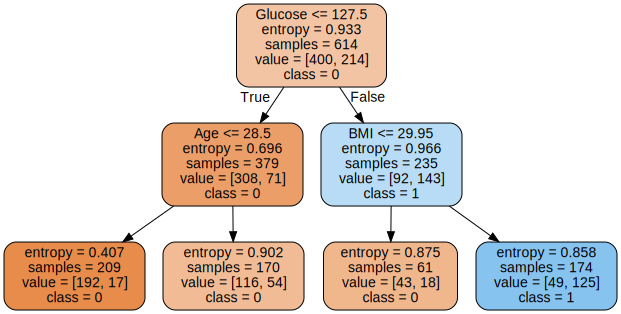

Tree Number 8
Accuracy: 0.7597402597402597
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


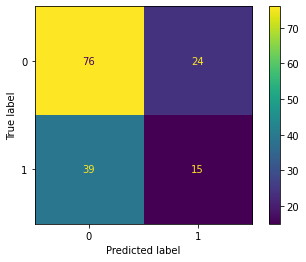

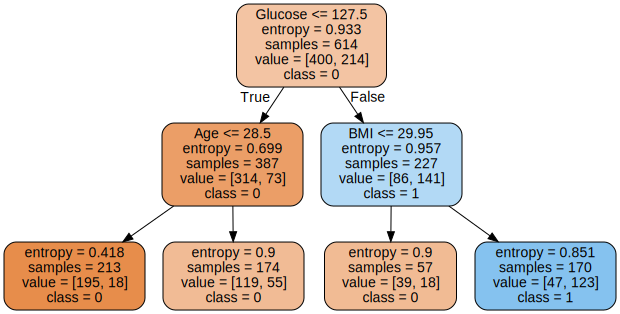

Tree Number 9
Accuracy: 0.7337662337662337
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


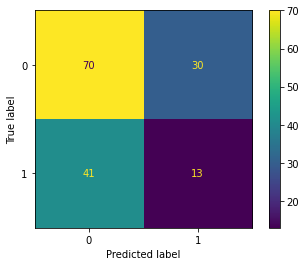

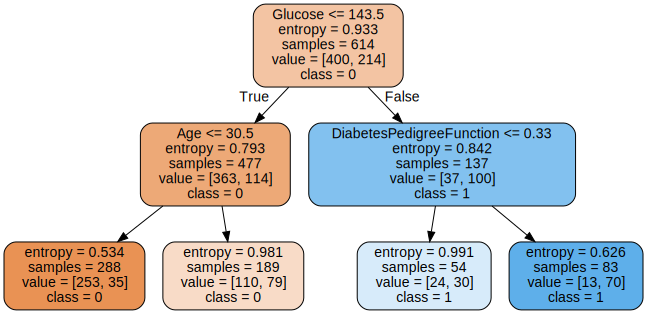

Tree Number 10
Accuracy: 0.7532467532467533
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


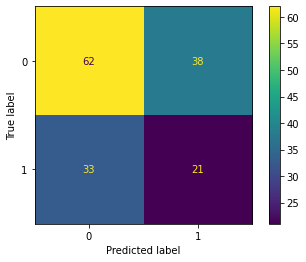

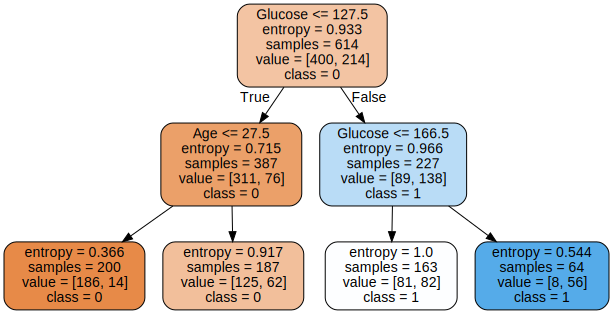

In [ ]:
for i in range(10):

    cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random.seed())

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=20)

    for train_index, test_index in cv.split(X,y):
        clf.fit(X.loc[train_index], y.loc[train_index])
        y_pred = clf.predict(X.loc[test_index])
        y_test = y.loc[test_index]

        print("Tree Number", i+1)

        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

        plot_confusion_matrix(clf, X_test, y_test)

        #predicted_probas = clf.predict_proba(X_test)

        #skplt.metrics.plot_roc(y_test, predicted_probas)
        plt.show()

        dot_data = export_graphviz(clf, filled=True, rounded=True,max_depth=3,out_file=None,
        feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness",
        "Insulin","BMI","DiabetesPedigreeFunction","Age"], class_names=['0','1'])
        graph = graphviz.Source(dot_data)

        
        display(graph)
        

Percebe-se que as árvores criadas a partir dos dados separados de forma estratificada tem muito menos variação que as anteriores. Essas árvores possuem acurácias variando entre 0,71 a 0,75. Ainda, o valor mais pessimista dessas árvores ultrapassa o desempenho da baseline criada no experimento A.

Além disso, com os plots da matriz de confusão há uma clara diferença entre os acertos em uma classe para outra no método sem estratificação. Os modelos parecem entender mais instâncias que são da classe 0(não tem diabetes) do que a classe 1 (tem diabetes). Por outro lado, na versão estratificada, os modelos tem um comportamento bem parecido de acertos por categoria, fomentando ainda mais o argumento de que o balanceamento das classes tem um papel muito importante no poder de generalização dos modelos preditivos.

Na estrutura das árvores, não há muita diferença. Apenas observa-se que combinações de atributos glicose, idade e/ou BMI, parecem ser fatores decisivos nas predições do modelo. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=908df4fb-3720-4462-a819-7a942e67f8a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>